# What happens if we stop early? 
Write a small simulation to learn about what happens if we write a test that stops **as soon** as there is as "stat sig" treatment effect. 

Here's the catch, make it so that there is *exactly* zero treatment effect. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats 

First, lets write something the right way, so that there is actually no treatment effect. In this case, let's see if we can learn how frequently we have a false rejection of the null hypothesis. 

In [2]:
def whole_experiment(NROWS, NSIMS): 
    """ 
    What happens if we run this the right way? 
    --- 
    In this simulation, both y1 and y0 are drawn from the same distribution. 
    And so, there is *no treatment effect at all*. 
    """
    
    p_val = np.ones(NSIMS)
    
    for sim in range(NSIMS): 
        y1 = np.random.randn(NROWS)
        y0 = np.random.randn(NROWS)

        p_val[sim] = scipy.stats.ttest_ind(y1, y0)[1]

    return p_val

In [3]:
res = whole_experiment(NROWS=1000, NSIMS=1000)
(res < 0.05).mean()

0.051

Hey! That isn't too bad! 

In [4]:
def cheat_experiment(NROWS, NSIMS, crit_val): 
    """
    What happens if we run it the wrong way? 
    --- 
    In this experiment, we're going to simulate looking after *every* new person
    filters through your experiment. While there is still no treatment effect at 
    all, the longer we look at the experiment, the more likely we are to call 
    a winner. 
    --- 
    The outter loop works through each of the *simulations* which is an experiment. 
    The inner loop checks each of the rows in that particular experiment. 
    """
    
    p_val = np.ones(NROWS)
    reject = np.zeros(NSIMS)
    
    for sim in range(NSIMS): 

        y1 = np.random.randn(NROWS)
        y0 = np.random.randn(NROWS)

        for i, row in enumerate(range(10, NROWS)): 
            p_val[i] = scipy.stats.ttest_ind(y1[:row], y0[:row])[1]
            
        reject[sim] = np.any(p_val < crit_val)
    
    return reject 

In [ ]:
res = []
exp_size = [20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 500, 1000, 2000]

for size in exp_size: 
    print(size, end=' -> ', flush=True)
    res.append(cheat_experiment(size, 1000, 0.05).mean())

20 -> 30 -> 40 -> 50 -> 60 -> 70 -> 80 -> 90 -> 100 -> 200 -> 300 -> 500 -> 1000 -> 2000 -> 

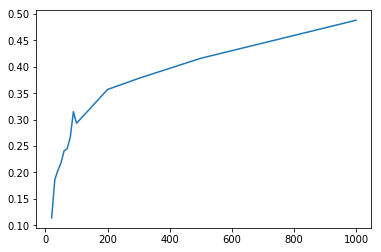

In [147]:
plt.plot(exp_size, res)